# <center> ANN FINAL ASSIGNMENT WS22/23 </center>

Name : Christeena Varghese<br>
k number : k54784<br>
Matriculation number: 5122716<br>
Mail.id: christeena.varghese@study.thws.de<br>
Submitted on: 22.01.2023    

## Aim
* The aim of this task is to predict the category of an image. Category ranges from 0 to 9.
* To implement three different algorithm.

## Overview

#### DATA set
The test and training data consists of four sub-datasets that are randomly mixed together:<br>
1.MNIST<br>
2.FashionMNIST<br>
3.permuted MNIST (one permutation)<br>
4.permuted FashionMNIST(same permutation as permuted MNIST)
#### Data format
28x28 PNG files
#### ADAM optimizer
I evaluated the performance of all 3 models with same epochs and different optimizers (ADAM & SGD). I found that even though the execution is faster with SGD optimizer, accuracy is more with ADAM optimizer which is an extension of SGD.<br>
#### CrossEntropy: 
Is the most commnly used loss funtion for classification problems.
#### MLP
* MLPs models are the most basic deep neural network.<br>
* It is composed of a series of fully connected layers.<br>
* Moreover it is used in classification problems.

#### CNN
* A CNN, or convolutional neural network, is a type of neural network architecture specifically designed for image and video recognition.<br> 
* CNNs use a combination of convolutional layers, pooling layers, and fully connected layers to analyze and classify visual data.<br>  
* In a convolutional layer, the network learns a set of filters that can be applied to the input image to extract features, such as edges or textures.<br>  
* The pooling layer then downsamples the image to reduce its dimensionality and emphasize the most important features.<br>  
* Fully connected layers are then used to make a final prediction about the image, such as classifying it as a specific object.

#### RELU
In tanh and sigmoid activation function there is a problem of vanishng gradient descent. Which means the differenciatio value is almost near to zero( 0.000000 something). Inorder to overcome such vanidhing gradient problem ReLu. In ReLu we get the activation value as 1 or 0 (if negative it will be 0 and if positive it will be 1).
##### Leaky ReLU
In RelU there is chances of occuring dead neurons. That is some neurons wont get activated and the function returns zero.And so weights are not getting updated. Inorder to avoid such scenario LeakyRelu can be used. Where the function return 0.01 if negative and 1 in the othercase(including x= 0). 

## Run
* Load "import libraries" section and "loading dataset" once before all the three models and then run the respective code sections in each model.

## Import Libraries

In [1]:
import torch, torchvision
from torch import nn                          # all neural network models
from torch import optim                       # various optimization algorithms
import torch.optim as optim    
from torchvision.transforms import ToTensor   # convert a PIL Image or numpy.ndarray to tensor
import torch.nn.functional as F               # activation functions
import matplotlib.pyplot as plt               # plotting
from torchvision import datasets, transforms
from torch.utils.data import DataLoader       # 
import cv2                                    # image processing,
import os                                     # to interact with the operating system
import random                                 # for generating random numbers
import pandas as pd
from os import listdir                        # to list all the files in a directory

##  Loading Dataset

In [5]:
'''
Here I am loading images from a dataset which is stored on the local machine and storing them in a list called "Images_Dataset". 
The "Images_Dataset" list contains two elements, the first element is a 4D tensor with dimensions (240001,28,28,3) which will store the images loaded, and the second element is a 1D tensor with dimension (240001) which will store the labels of the images.

Then I defined a list called "classes" which contains the labels of the images, i.e. '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'. 
Initialized a variable "images_counter" with a value of 0, which will be used to count the total number of images loaded.

Created a for loop to iterate over the "classes" list, and for each class, to accesses the corresponding folder on the local machine, which contains the images for that class. 
Created another for loop to iterate over the images in the folder and loads them using the cv2 library. 
The images are then converted from the BGR color format to the RGB color format using the cv2.cvtColor() function. 
The images are then converted to a Pytorch tensor using the "torch.tensor()" function.

The index of the current image is calculated by adding the current count of the inner for loop to the global count of images loaded, and this index is used to store the image and its label in the "Images_Dataset" list. 
For viewing, printed the current image number and folder name to keep track of the loading process.

After loading all the images of a class, the code adds the number of images retrieved from the current folder to the global images counter and then prints the number of images in the current folder. 
Finally, after loading all the images, the code prints the total number of images loaded.
'''

Images_Dataset = [torch.zeros(240001,28,28,3) , torch.zeros((240001) , dtype=torch.int64)]
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
images_counter = 0                                     # Counts the total number of images loaded
for i in classes:
    folder = f"C:/Users/chris/MAI/ANN/dataset/train/{i}"
    print(f"loading images in  : {i} folder")
    index_counter = 0
    for count, filename in enumerate(os.listdir(folder)):
        src =f"{folder}/{filename}"
        im = cv2.imread(src)                            # Load the image using Cv2
        img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)       # Converts the image into RGB from BGR
        image = torch.tensor(img)
        index = images_counter + count                  # Returns how many images have been added so far (globally)
        Images_Dataset[0][index] = image                # stores the image (feature)
        Images_Dataset[1][index] = classes.index(i)     # Stores the Label of the image added
        print(f"Image number {count} of folder {i}")
    images_counter = images_counter + count             # adds the number of images retrieved from the previous folder(class)
    print(f"class {i} have : {count} Images")
print("----------------------------")
print(f"A total of {images_counter} images loaded")

class 0 have : 23845 Images
class 1 have : 25483 Images
class 2 have : 23915 Images
class 3 have : 24261 Images
class 4 have : 23683 Images
class 5 have : 22841 Images
class 6 have : 23835 Images
class 7 have : 24529 Images
class 8 have : 23701 Images
class 9 have : 23897 Images
A total of 239990 images loaded


## Plotting

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


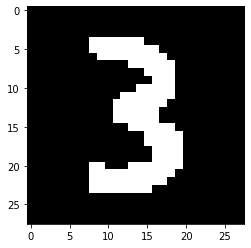

In [6]:
plt.imshow(Images_Dataset[0][78956])

In [7]:
Images_Dataset[1][78956]

tensor(3)

In [8]:
Images_Dataset[0][0].shape

torch.Size([28, 28, 3])

# Model 1 : MLP

## Build Model

In [9]:
'''
This an MLP architecture with 5 hidden layers and one output layer. 
It has 2352 (28*28*3) inputs and 10 output neurons. 
Each hidden layer has less neurons than the previous one and the output layer is fully connected to the last hidden layer. 

In this method, the parent class "nn.Module" is initialized using the "super()" function.
The class then declares several attributes, which represent the layers of the neural network. 
Each layer is an instance of the "nn.Linear" class which is a fully connected linear layer. 
The first layer, "layer_1" has 2352 inputs and 512 outputs, 
the second layer "layer_2" has 512 inputs and 256 outputs and so on. 
The last layer "layer_final" has 16 inputs and 10 outputs.

The class also defines a forward method which takes an input and applies it to the layers of the network in the order 
they are defined.
Each output from the linear layers is passed through a non-linear activation function "nn.ReLU()" which applies 
the rectified linear unit function element-wise, this help to introduce non-linearity in the model. 

The final output of the forward method is the output of the last layer, "layer_final".

'''


class MLP(nn.Module):
    def __init__(self):
        super(MLP,self).__init__()

        self.layer_1 = nn.Linear(2352, 512)
        self.relu1 = nn.ReLU()
        self.layer_2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.layer_3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.layer_4 = nn.Linear(128, 64)
        self.relu4 = nn.ReLU()
        self.layer_5 = nn.Linear(64, 16)
        self.relu5 = nn.ReLU()
        self.layer_final = nn.Linear(16, 10)

    def forward(self, input):
        out = self.layer_1(input)
        out = self.relu1(out)
        out = self.layer_2(out)
        out = self.relu2(out)
        out = self.layer_3(out)
        out = self.relu3(out)
        out = self.layer_4(out)
        out = self.relu4(out)
        out = self.layer_5(out)
        out = self.relu5(out)
        out = self.layer_final(out)
        return out

In [10]:
Model = MLP()                                               # model
Loss = nn.CrossEntropyLoss()                                # loss function
learning_rate = 0.000001
optimizer = optim.Adam(Model.parameters(), learning_rate)   # optimizer
#optimizer = optim.SGD(Model.parameters(), learning_rate)   # optimizer

## Training

In [12]:
loss_buffer = []                                            # to store the loss values during training.
epochs = 2

entries_number = Images_Dataset[0].size(dim=0)              # returns the number of images in Images_Dataset as an Integer

for epoch in range(epochs):                                 
    print(f"[INFO]: Epoch {epoch+1} of {epochs}")
    for i in range (entries_number):                        # loop over data for each epoch
    
        random_number = random.randint(0,239990)            # random selection: return one between 0 and 239990
    
        images,labels = Images_Dataset[0][random_number], Images_Dataset[1][random_number]
        images_reshaped = torch.reshape(images,(1,2352))    # returns a reshaped tensor

        #forward pass
        predictions = Model.forward(images_reshaped)
        _, classes = torch.max(predictions,1)

        if (i % 1000 == 0):
            print(f"predicted Class : {classes.item()}")    #to keep track of the training progress
            print(f"True Class : {labels}")
        if(i % 10000 == 0):
            print(f"Checkpoint: Currently on image {i}")


        new_label = torch.zeros_like(predictions)
        new_label[0][labels] = 1 
    
        #Calculate loss
        loss = Loss(predictions, new_label)

        #Backward (get gradients)
        #zero the parameter gradients
        optimizer.zero_grad()                            
        loss.backward()

        #SGD Update Weights (adjust parameters based on the calculated gradients)
        optimizer.step()

        loss_buffer.append(loss.item())

    print(f"Epoch {epoch} Loss {loss}")
    

[INFO]: Epoch 1 of 2
Epoch 0 Loss 0.40431955456733704
[INFO]: Epoch 2 of 2
Epoch 1 Loss 0.17399942874908447


## Plotting Loss

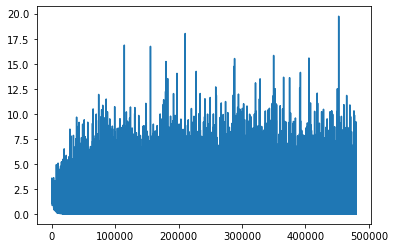

In [13]:
plt.plot(loss_buffer)

## Loading Test Data

In [14]:
'''
This part will read and process image files in a directory and count the number of images.
A "count"  variable is initialized with a value of 0, which will be used to keep track of the number of images processed. 
An empty list "image_store",is used to store the names of the images.
Created a for loop to iterate over the files in the directory. 
For each file, it checks if the file ends with ".png" using the "endswith()" method. 
If the file is an image file, it uses the "split()" method to split the filename into two parts, the name and the extension. 
It stores the name of the image in the "image_store" list, and prints the name of the image.

'''


import os
from os import listdir
 
# get the path/directory
test_dataset = "C:/Users/chris/MAI/ANN/dataset/test"
count = 0
image_store = [] 
for images in os.listdir(test_dataset):
    
    
    # check if the image ends with png
    if (images.endswith(".png")):
        splitter = images.split(".", 1)
        splitted = splitter[0]
        image_store.append(splitted)
 
        #print(images)
        count += 1
print('File count:', count)



File count: 40000


In [15]:
'''
This code is loading images from a test dataset stored on the local machine and storing them in a list called "test". 
The "test" list contains two elements, the first element is a 4D tensor with dimensions (40001,28,28,3), will store the images loaded.
The second element is a 1D tensor with dimension (40001) which will store the labels of the images.
Created a for loop to iterate over the files in the test directory. 
For each file, it loads the image using the cv2 library. 
This will convert the image from the BGR color format to the RGB color format using the cv2.cvtColor() function. 
The image is then converted to a Pytorch tensor using the "torch.tensor()" function.

'''
loss_buffer = []
test_dataset = "C:/Users/chris/MAI/ANN/dataset/test"

count = 0
test = [torch.zeros(40001,28,28,3) , torch.zeros((40001) , dtype=torch.int64)]
image_counter_test = 0                  

index_counter = 0
for count, filename in enumerate(os.listdir(test_dataset)):
    src =f"{test_dataset}/{filename}"
    im = cv2.imread(src)                                      # Load the image using Cv2
    img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)                 # Converts the image into RGB from BGR
    image = torch.tensor(img)

    index = image_counter_test + count                        # Returns how many images have been added so far (globally)
    test[0][count] = image                                    # stores the image (feature)
      
image_counter_test = image_counter_test + count               # adds the number of images retrieved from the previous folder(class)
  
print("----------------------------")
print(f"A total of {image_counter_test} images loaded")     


A total of 39999 images loaded


## Predicting

In [17]:
'''
This part is to make predictions on the test dataset. 
First it calculates number of images in the "test" dataset using the size() function.
Then it assigns the result to the variable "entries_number".

Created a for loop to iterate over the number of images in the test dataset. 
Inside this loop, an image is selected from the test dataset by using the current index of the loop.
This will be used as an index to access the image from the "test" list. 
The selected image is then reshaped to (1,2352) using the reshape() function from Pytorch.

The reshaped image is then passed through the model using the forward() method. 
The output is then stored in the "predictions" variable. 
The output tensor from the model is passed through the torch.max() function which returns the maximum value and its index.
This index is the predicted class.

The function then appends the predicted class to the list "test_predictions". 

'''
entries_number = test[0].size(dim=0)            # returns the number of images in Images_Dataset as an Integer

#for epoch in range(epochs):
test_predictions = []

for i in range (entries_number):      
     
    images = test[0][i]
    images_reshaped = torch.reshape(images,(1,2352))

    #forward pass
    predictions = Model.forward(images_reshaped)
    _, classes = torch.max(predictions,1)    
    test_predictions.append(classes.item())

    if (i % 5 == 0):
        print(f"predicted Class : {classes.item()}")
     

In [18]:
print(test_predictions)

## Plotting

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


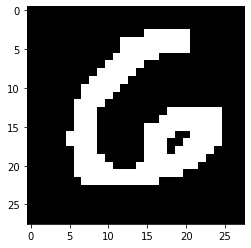

In [19]:
plt.imshow(test[0][0])

## View Predictions

In [20]:
del test_predictions[-1]


list_i = []
for i in range (240000, 280000):
    list_i.append(i)
    
df_prediction = pd.DataFrame({'id': image_store,'Classification':test_predictions}) #'images':classes
print(df_prediction)

## CSV (Exporting)

In [33]:
df_prediction.to_csv("C:/Users/chris/MAI/ANN/MLP8ADAM2.csv", index = False)

# Model 2 : CNN

## Build Model

In [21]:
'''
The CNN consists of several layers:

1. Three convolutional layers: Conv2d(3, 32, kernel_size=3 , stride=1,padding=1), 
                               Conv2d(32,16 , 3), 
                               Conv2d(16,8 , 3)
2. Three max pooling layers: MaxPool2d(2, 2), 
                             MaxPool2d(2, 2), 
                             MaxPool2d(2, 2)
3. Two fully connected layers: Linear(32, 16), 
                               Linear(16, 10)
The first convolutional layer takes an input of shape (3,28,28) and applies 32 filters of size (3,3) with stride 1 and padding 1. 
Then, a max pooling layer applies max pooling operation with kernel size (2,2) and stride 2. 
This will reduce the spatial dimensions of the feature maps by half.

The second and the third convolutional layer applies the same process as the first layer, 
but with different number of filters. 
The number of filters decreases from 32 to 16 and finally to 8.

The output from the last pooling layer is reshaped using the reshape() function
This will be fedede into the first fully connected layer(fc1). 
The fc1 layer has 32 input features and 16 output features. 
The output is then passed through a ReLU activation function.

The output of the fc1 is then passed to the fc2 layer, 
which has 16 input features and 10 output features. 
The output of the fc2 is the final output of the CNN.

'''

class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3 , stride=1,padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(32,16 , 3)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(16,8 , 3)
        self.pool3 = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(32, 16)
        self.fc2 = nn.Linear(16, 10)

    def forward(self, x):

        x = self.conv1(x)  
        x = F.relu(x)         
        x = self.pool(x)    

        x = self.conv2(x)
        x = F.relu(x) 
        x = self.pool2(x) 

        x = self.conv3(x)
        x = F.relu(x) 
        x = self.pool3(x) 

        x = x.reshape(x.shape[0], -1)   
        x = self.fc1(x)
        x = F.relu(x)   
        x = self.fc2(x)                                   
        return x

Model = Classifier()

Loss = nn.CrossEntropyLoss()
learning_rate = 0.00001
optimizer = optim.Adam(Model.parameters(), learning_rate)
#optimizer = optim.SGD(Model.parameters(), learning_rate)

## Training

In [22]:
loss_buffer = []
epochs = 2

entries_number = Images_Dataset[0].size(dim=0) # returns the number of images in Images_Dataset as an Integer

for epoch in range(epochs):    
    print(f"[INFO]: Epoch {epoch+1} of {epochs}")
    for i in range (entries_number):
        index = random.randint(0, entries_number-1)             #(instead of schuffling) randomly generates the index because we don't our model to get images that belong to one class consequatively
        images,labels = Images_Dataset[0][index], Images_Dataset[1][index]      

        #forward pass
        input = torch.reshape(images,(1,3,28,28))
        #print(input.shape)
        predictions = Model.forward(input)
        _, classes = torch.max(predictions,1)

        if (i % 1000 == 0):
            
            print(f"predicted Class : {classes.item()}")
            print(f"True Class : {labels}")
        if(i % 10000 == 0):
            print(f"Checkpoint: Currently on image {i}")


        new_label = torch.zeros_like(predictions)
        new_label[0][labels] = 1 

        #Calculate loss
        loss = Loss(predictions,new_label)

        #Backward (get gradients)
        optimizer.zero_grad()
        loss.backward()

        #SGD Update Weights
        optimizer.step()

        loss_buffer.append(loss.item())

    print(f"Epoch {epoch} Loss {loss}")

[INFO]: Epoch 1 of 2
Epoch 0 Loss 1.7153303623199463
[INFO]: Epoch 2 of 2
Epoch 1 Loss 0.0012040039291605353


## Plotting Loss

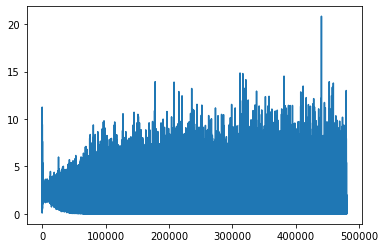

In [23]:
plt.plot(loss_buffer)

## Loading Test Data

In [24]:
loss_buffer = []
test_dataset = "C:/Users/chris/MAI/ANN/dataset/test"

count = 0
test = [torch.zeros(40001,28,28,3) , torch.zeros((40001) , dtype=torch.int64)]
image_counter_test = 0                  

index_counter = 0
for count, filename in enumerate(os.listdir(test_dataset)):
    src =f"{test_dataset}/{filename}"
    im = cv2.imread(src)                            # Load the image using Cv2
    img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)       # Converts the image into RGB from BGR
    image = torch.tensor(img)

    index = image_counter_test + count                  # Returns how many images have been added so far (globally)
    test[0][count] = image                # stores the image (feature)
      
image_counter_test = image_counter_test + count             # adds the number of images retrieved from the previous folder(class)
  
print("----------------------------")
print(f"A total of {image_counter_test} images loaded")     


A total of 39999 images loaded


## Predicting

In [25]:
num_of_test_images = test[0].size(dim=0)
test_predictions = []
with torch.no_grad():
    
    for i in range(num_of_test_images):               
        images,labels = test[0][i] , test[1][i]
        input = torch.reshape(images,(1,3,28,28))
        predictions = Model.forward(input)
        _, classes = torch.max(predictions,1)
        test_predictions.append(classes.item())
        print(f"Prediction {classes.item()}")
    #print(f"True label {predictions}")
    

## Plotting

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


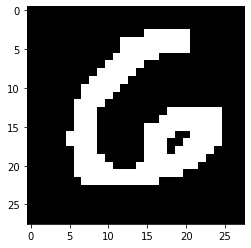

In [26]:
plt.imshow(test[0][0])

## Viewing

In [27]:
del test_predictions[-1]


list_i = []
for i in range (240000, 280000):
    list_i.append(i)
    
df_prediction = pd.DataFrame({'id': image_store,'Classification':test_predictions}) #'images':classes
print(df_prediction)

## CSV (Exporting)

In [28]:
df_prediction.to_csv("C:/Users/chris/MAI/ANN/cnnADAM2.csv", index = False)

# Model 2.1 : Variation in CNN

## Build Model

In [29]:
class Classifier(nn.Module):
    def __init__(self):
        super (Classifier,self).__init__()
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3 , stride=1,padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(32,16 , 3)
        self.relu = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)
        
        #self.droupout = nn.Dropout(p=0.25)
        
        self.conv3 = nn.Conv2d(16,8 , 3)
        self.relu = nn.ReLU()
        self.pool3 = nn.MaxPool2d(2, 2)  
        
        self.fc1 = nn.Linear(32, 16)
        self.fc2 = nn.Linear(16, 10)      

      

    def forward(self, x):
        x = self.conv1(x)  
        x = F.relu(x)         
        x = self.pool(x)
                 

        x = self.conv2(x)
        x = F.relu(x) 
        x = self.pool2(x) 

        x = self.conv3(x)
        x = F.relu(x) 
        x = self.pool3(x) 

        x = x.reshape(x.shape[0], -1)        
        x = self.fc1(x)
        x = F.relu(x)   
        x = self.fc2(x)                                   
        return x

Model = Classifier()

Loss = nn.CrossEntropyLoss()
learning_rate = 0.00001
optimizer = optim.Adam(Model.parameters(), learning_rate)
#optimizer = optim.SGD(Model.parameters(), learning_rate)

## Training

In [30]:
loss_buffer = []
epochs = 2

entries_number = Images_Dataset[0].size(dim=0) # returns the number of images in Images_Dataset as an Integer

for epoch in range(epochs):       
    print(f"[INFO]: Epoch {epoch+1} of {epochs}")
    for i in range (entries_number):                
        index = random.randint(0, entries_number-1)             #(instead of schuffling) randomly generates the index because we don't our model to get images that belong to one class consequatively
        images,labels = Images_Dataset[0][index], Images_Dataset[1][index]      

        #forward pass
        input = torch.reshape(images,(1,3,28,28))
        #print(input.shape)
        predictions = Model.forward(input)
        _, classes = torch.max(predictions,1)

        #if (i % 1000 == 0):            
            #print(f"predicted Class : {classes.item()}")
            #print(f"True Class : {labels}")
        #if(i % 10000 == 0):
           # print(f"Checkpoint: Currently on image {i}")


        new_label = torch.zeros_like(predictions)
        new_label[0][labels] = 1 

        #Calculate loss
        loss = Loss(predictions,new_label)

        #Backward (get gradients)
        optimizer.zero_grad()
        loss.backward()

        #SGD Update Weights
        optimizer.step()

        loss_buffer.append(loss.item())

    print(f"Epoch {epoch} Loss {loss}")

[INFO]: Epoch 1 of 2
Epoch 0 Loss 0.07191930711269379
[INFO]: Epoch 2 of 2
Epoch 1 Loss 0.6592334508895874


In [44]:
Images_Dataset[0][0].shape

torch.Size([28, 28, 3])

## Plotting Loss

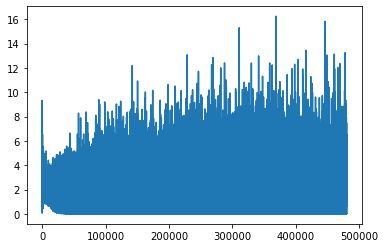

In [45]:
plt.plot(loss_buffer)

## Loading Test Data

In [46]:
loss_buffer = []
test_dataset = "C:/Users/chris/MAI/ANN/dataset/test"

count = 0
test = [torch.zeros(40001,28,28,3) , torch.zeros((40001) , dtype=torch.int64)]
image_counter_test = 0                  

index_counter = 0
for count, filename in enumerate(os.listdir(test_dataset)):
    src =f"{test_dataset}/{filename}"
    im = cv2.imread(src)                            # Load the image using Cv2
    img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)       # Converts the image into RGB from BGR
    image = torch.tensor(img)

    index = image_counter_test + count                  # Returns how many images have been added so far (globally)
    test[0][count] = image                # stores the image (feature)
      
image_counter_test = image_counter_test + count             # adds the number of images retrieved from the previous folder(class)
  
print("----------------------------")
print(f"A total of {image_counter_test} images loaded")     


----------------------------
A total of 39999 images loaded


## Predicting

In [31]:
num_of_test_images = test[0].size(dim=0)
test_predictions = []
with torch.no_grad():
    
    for i in range(num_of_test_images):               
        images,labels = test[0][i] , test[1][i]
        input = torch.reshape(images,(1,3,28,28))
        predictions = Model.forward(input)
        _, classes = torch.max(predictions,1)
        test_predictions.append(classes.item())
        print(f"Prediction {classes.item()}")
    #print(f"True label {predictions}")
    

## Plotting

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


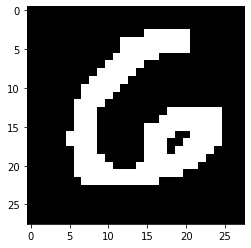

In [32]:
plt.imshow(test[0][0])

## Viewing

In [33]:
del test_predictions[-1]


list_i = []
for i in range (240000, 280000):
    list_i.append(i)
    
df_prediction = pd.DataFrame({'id': image_store,'Classification':test_predictions}) #'images':classes
print(df_prediction)

## CSV (Exporting)

In [34]:
df_prediction.to_csv("C:/Users/chris/MAI/ANN/CNNLENET2.csv", index = False)

# Model 3 : CONV1D

## Loading Dataset

In [36]:
'''
The first tensor stores the images as grayscale and the second tensor stores the labels of the images.
'''
Images_Dataset = [torch.zeros(240001,28,28) , torch.zeros((240001) , dtype=torch.int64)]

classes = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']
images_counter = 0                 # Counts the total number of images loaded
for i in classes:
    folder = f"C:/Users/chris/MAI/ANN/dataset/train/{i}"
    print(f"loading images in  : {i} folder")
    index_counter = 0
    for count, filename in enumerate(os.listdir(folder)):        
        src =f"{folder}/{filename}"
        im = cv2.imread(src)                            # Load the image using Cv2
        img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)       # Converts the image into GRAY from BGR (to make 1 channel)
        image = torch.tensor(img)

        index = images_counter + count                  # Returns how many images have been added so far (globally)
        Images_Dataset[0][index] = image                # stores the image (feature)
        Images_Dataset[1][index] = classes.index(i)     # Stores the Label of the image added
        print(f"Image number {count} of folder {i}")
    images_counter = images_counter + count             # adds the number of images retrieved from the previous folder(class)
    print(f"class {i} have : {count} Images")
print("----------------------------")
print(f"A total of {images_counter} images loaded")

A total of 239990 images loaded


## Plotting

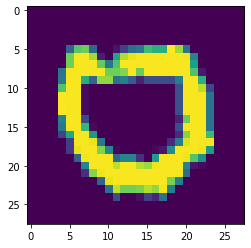

In [37]:
plt.imshow(Images_Dataset[0][78])

## Build Model

In [38]:
class Classifier(nn.Module):    
    def __init__(self):
        super(Classifier, self).__init__()
        self.conv1 = nn.Conv1d(28, 32, kernel_size=2 , stride=1,padding=1)
        self.pool = nn.MaxPool2d(1, 1)

        self.conv2 = nn.Conv1d(32,16 ,2)
        self.pool2 = nn.MaxPool2d(1, 1)

        #self.droupout = nn.Dropout(p=0.25)

        self.conv3 = nn.Conv1d(16,1 , 2)
        self.pool3 = nn.MaxPool2d(1, 1)

        self.fc1 = nn.Linear(27, 16)
        self.fc2 = nn.Linear(16, 10)

    def forward(self, x):

        x = self.conv1(x)  
        x = F.relu(x)         
        x = self.pool(x)    

        x = self.conv2(x)
        x = F.relu(x) 
        x = self.pool2(x) 

        x = self.conv3(x)
        x = F.relu(x) 
        x = self.pool3(x) 
              
        x = self.fc1(x)
        x = F.relu(x)   
        x = self.fc2(x)                                   
        return x
'''
The input for the model is a 1-dimensional tensor with a length of 28.
The output is a 10-dimensional tensor representing the 10 classes of the dataset.
'''
Model = Classifier()

Loss = nn.CrossEntropyLoss()
learning_rate = 0.00001
optimizer = optim.Adam(Model.parameters(), learning_rate)
#optimizer = optim.SGD(Model.parameters(), learning_rate)

## Training

In [39]:
loss_buffer = []
epochs = 2

entries_number = Images_Dataset[0].size(dim=0) # returns the number of images in Images_Dataset as an Integer

for epoch in range(epochs):    
    print(f"[INFO]: Epoch {epoch+1} of {epochs}")
    for i in range (entries_number):
        index = random.randint(0, entries_number-1)             #(instead of schuffling) randomly generates the index because we don't our model to get images that belong to one class consequatively
        images,labels = Images_Dataset[0][index], Images_Dataset[1][index]  

        #forward pass
        input = torch.reshape(images,(1,28,28))
        predictions = Model.forward(input)
        _, classes = torch.max(predictions[0],1)

        if (i % 1000 == 0):            
            print(f"predicted Class : {classes.item()}")
            print(f"True Class : {labels}")
        if(i % 10000 == 0):
            print(f"Checkpoint: Currently on image {i}")

        new_label = torch.zeros_like(predictions[0])
        new_label[0][labels] = 1 

        #Calculate loss
        loss = Loss(predictions[0],new_label)

        #Backward (get gradients)
        optimizer.zero_grad()
        loss.backward()

        #SGD Update Weights
        optimizer.step()

        loss_buffer.append(loss.item())

    print(f"Epoch {epoch} Loss {loss}")

[INFO]: Epoch 1 of 2
Epoch 0 Loss 0.06584741920232773
[INFO]: Epoch 2 of 2
Epoch 1 Loss 2.4197075366973877


In [40]:
Images_Dataset[0][0].shape

torch.Size([28, 28])

## Plotting Loss

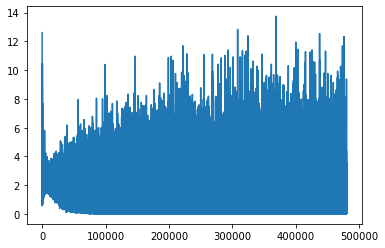

In [41]:
plt.plot(loss_buffer)

## Loading Test Data

In [43]:
import os
from os import listdir
 
# get the path/directory
test_dataset = "C:/Users/chris/MAI/ANN/dataset/test"
count = 0
image_store = [] 
for images in os.listdir(test_dataset):
    
    
    # check if the image ends with png
    if (images.endswith(".png")):
        splitter = images.split(".", 1)
        splitted = splitter[0]
        image_store.append(splitted)
 
        print(images)
        count += 1
print('File count:', count)

In [44]:
loss_buffer = []
test_dataset = "C:/Users/chris/MAI/ANN/dataset/test"

count = 0
test = [torch.zeros(40001,28,28) , torch.zeros((40001) , dtype=torch.int64)]
image_counter_test = 0                  

index_counter = 0
for count, filename in enumerate(os.listdir(test_dataset)):
    src =f"{test_dataset}/{filename}"
    im = cv2.imread(src)                            # Load the image using Cv2
    img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)       # Converts the image into RGB from BGR
    image = torch.tensor(img)

    index = image_counter_test + count                  # Returns how many images have been added so far (globally)
    test[0][count] = image                # stores the image (feature)
      
image_counter_test = image_counter_test + count             # adds the number of images retrieved from the previous folder(class)
  
print("----------------------------")
print(f"A total of {image_counter_test} images loaded")     


A total of 39999 images loaded


## Predicting

In [45]:
num_of_test_images = test[0].size(dim=0)
test_predictions = []
with torch.no_grad():   
    
    for i in range(num_of_test_images):
        images,labels = test[0][i] , test[1][i]
        input = torch.reshape(images,(1,28,28))

        predictions = Model.forward(input)
        _, classes = torch.max(predictions[0],1)
        test_predictions.append(classes.item())
        print(f"Prediction {classes.item()}")    

## Plotting

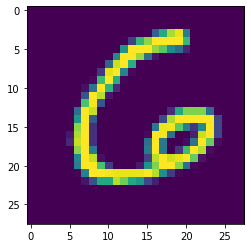

In [46]:
plt.imshow(test[0][0])

## Viewing

In [47]:
del test_predictions[-1]


list_i = []
for i in range (240000, 280000):
    list_i.append(i)
    
df_prediction = pd.DataFrame({'id': image_store,'Classification':test_predictions}) #'images':classes
print(df_prediction)

## CSV (Exporting)

In [49]:
df_prediction.to_csv("C:/Users/chris/MAI/ANN/con1D2.csv", index = False)

# Report

### Model Summary

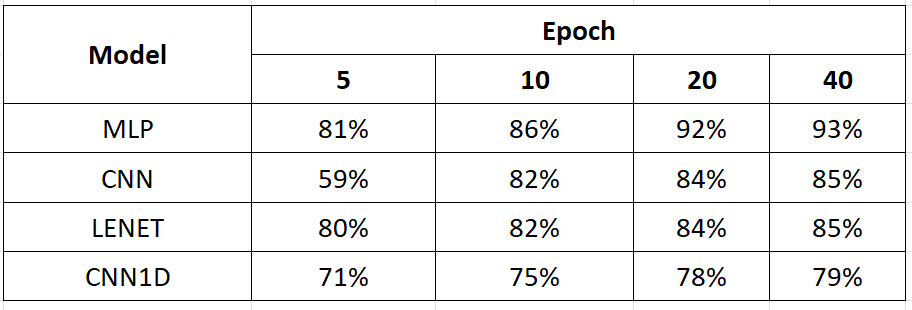

### Accuracy Chart

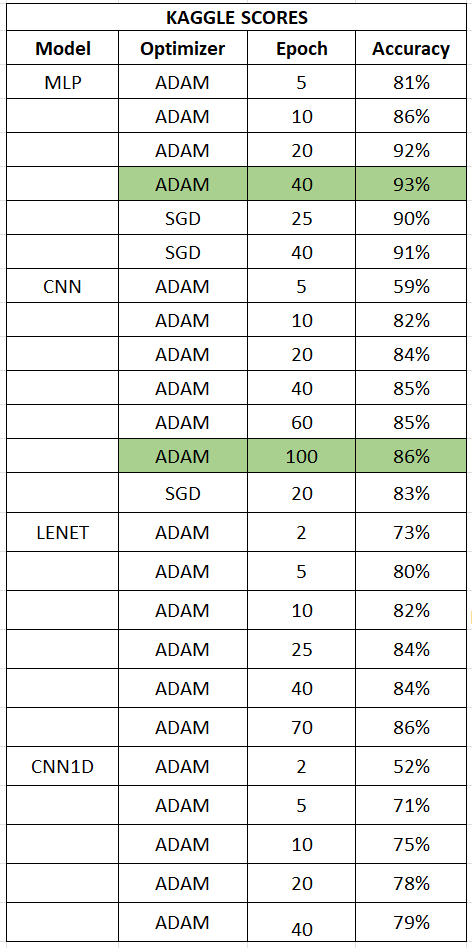